In [29]:
# 使用 seaborn 绘制矩阵图 (pairplot)
# pip install -q seaborn
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
import hashlib

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from enums import *
from utility import download_file, get_all_symbols, get_parser, get_start_end_date_objects, convert_to_date_object, \
  get_path

print(tf.__version__)

2.8.0


### 下载数据

[币安公开数据](https://github.com/binance/binance-public-data.git)

`H:\MyPrograms\CrazyProjects\BinanceData\python\data\spot\monthly\klines\ETHUSDT\1m\*.zip`

#### K 线数据

数据格式: `Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore`
路径:

```shell
python download-kline.py --help
# python download-kline.py -s BTCUSDT -i 1m -endDate 2021-12-31 -c 1
python download-kline.py -s BTCUSDT ETHUSDT BNBUSDT SOLUSDT XRPUSDT ADAUSDT LUNAUSDT AVAXUSDT DOTUSDT DOGEUSDT SHIBUSDT NEARUSDT MATICUSDT CROUSDT ATOMUSDT LTCUSDT LINKUSDT UNIUSDT TRXUSDT BCHUSDT FTTUSDT LEOUSDT ETCUSDT ALGOUSDT XLMSDT VETUSDT MANAUSDT HBARUSDT FILUSDT ICPUSDT XMRUSDT EGLDUSDT THETAUSDT SANDUSDT FTMUSDT AXSUSDT APEUSDT RUNEUSDT WAVESUSDT KLAYUSDT XTZUSDT AAVEUSDT HNTUSDT ZECUSDT CAKEUSDT -i 1m -endDate 2021-12-31 -c 1
python download-kline.py -s EOSUSDT FLOWUSDT IOTAUSDT MKRUSDT CVXUSDT XECUSDT GRTUSDT BTTUSDT BSVUSDT STXUSDT ONEUSDT CELOUSDT KCSUSDT NEOUSDT KSMUSDT ZILUSDT GALAUSDT MINAUSDT QNTUSDT ENJUSDT HTUSDT CHZUSDT NEXOUSDT LRCUSDT GMTUSDT DASHUSDT OKBUSDT CRVUSDT ARUSDT BATUSDT KDAUSDT AMPUSDT HOTUSDT TFUELUSDT XEMUSDT COMPUSDT ROSEUSDT SCRTUSDT KAVAUSDT GLMRUSDT ANCUSDT DCRUSDT ICXUSDT YFIUSDT IOTXUSDT -i 1m -endDate 2021-12-31 -c 1

# 历史交易
# trade Id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
python download-trade.py --help
# python download-trade.py -s BTCUSDT -startDate 2017-06-01 -endDate 2021-12-31 -c 1
python download-trade.py -s BTCUSDT ETHUSDT BNBUSDT SOLUSDT XRPUSDT ADAUSDT LUNAUSDT AVAXUSDT DOTUSDT DOGEUSDT SHIBUSDT NEARUSDT MATICUSDT CROUSDT ATOMUSDT LTCUSDT LINKUSDT UNIUSDT TRXUSDT BCHUSDT FTTUSDT LEOUSDT ETCUSDT ALGOUSDT XLMSDT VETUSDT MANAUSDT HBARUSDT FILUSDT ICPUSDT XMRUSDT EGLDUSDT THETAUSDT SANDUSDT FTMUSDT AXSUSDT APEUSDT RUNEUSDT WAVESUSDT KLAYUSDT XTZUSDT AAVEUSDT HNTUSDT ZECUSDT CAKEUSDT -startDate 2017-06-01 -endDate 2021-12-31 -c 1
python download-trade.py -s EOSUSDT FLOWUSDT IOTAUSDT MKRUSDT CVXUSDT XECUSDT GRTUSDT BTTUSDT BSVUSDT STXUSDT ONEUSDT CELOUSDT KCSUSDT NEOUSDT KSMUSDT ZILUSDT GALAUSDT MINAUSDT QNTUSDT ENJUSDT HTUSDT CHZUSDT NEXOUSDT LRCUSDT GMTUSDT DASHUSDT OKBUSDT CRVUSDT ARUSDT BATUSDT KDAUSDT AMPUSDT HOTUSDT TFUELUSDT XEMUSDT COMPUSDT ROSEUSDT SCRTUSDT KAVAUSDT GLMRUSDT ANCUSDT DCRUSDT ICXUSDT YFIUSDT IOTXUSDT -startDate 2017-06-01 -endDate 2021-12-31 -c 1

# 聚合交易
# Aggregate tradeId,Price,Quantity,First tradeId,Last tradeId,Timestamp,Was the buyer the maker,Was the trade the best price match
python download-aggTrade.py --help
# python download-aggTrade.py -s BTCUSDT -startDate 2017-06-01 -endDate 2021-12-31 -c 1
python download-aggTrade.py -s BTCUSDT ETHUSDT BNBUSDT SOLUSDT XRPUSDT ADAUSDT LUNAUSDT AVAXUSDT DOTUSDT DOGEUSDT SHIBUSDT NEARUSDT MATICUSDT CROUSDT ATOMUSDT LTCUSDT LINKUSDT UNIUSDT TRXUSDT BCHUSDT FTTUSDT LEOUSDT ETCUSDT ALGOUSDT XLMSDT VETUSDT MANAUSDT HBARUSDT FILUSDT ICPUSDT XMRUSDT EGLDUSDT THETAUSDT SANDUSDT FTMUSDT AXSUSDT APEUSDT RUNEUSDT WAVESUSDT KLAYUSDT XTZUSDT AAVEUSDT HNTUSDT ZECUSDT CAKEUSDT -startDate 2017-06-01 -endDate 2021-12-31 -c 1
python download-aggTrade.py -s EOSUSDT FLOWUSDT IOTAUSDT MKRUSDT CVXUSDT XECUSDT GRTUSDT BTTUSDT BSVUSDT STXUSDT ONEUSDT CELOUSDT KCSUSDT NEOUSDT KSMUSDT ZILUSDT GALAUSDT MINAUSDT QNTUSDT ENJUSDT HTUSDT CHZUSDT NEXOUSDT LRCUSDT GMTUSDT DASHUSDT OKBUSDT CRVUSDT ARUSDT BATUSDT KDAUSDT AMPUSDT HOTUSDT TFUELUSDT XEMUSDT COMPUSDT ROSEUSDT SCRTUSDT KAVAUSDT GLMRUSDT ANCUSDT DCRUSDT ICXUSDT YFIUSDT IOTXUSDT -startDate 2017-06-01 -endDate 2021-12-31 -c 1
```

### 数据完整性校验

```shell
# Linux
sha256sum -c BNBUSDT-1m-2021-01.zip.CHECKSUM

# From MacOS
shasum -a 256 -c BNBUSDT-1m-2021-01.zip.CHECKSUM

# Windows
type BNBUSDT-1m-2021-01.zip
certutil -hashfile BNBUSDT-1m-2021-01.zip SHA256
```

### 整理数据

使用 pandas 导入数据集。

#### 批量读取

In [37]:
file_dir = "H:\\MyPrograms\\CrazyProjects\\BinanceData\\python\\data\\spot\\monthly\\klines\\ETHUSDT\\1m\\"
print(file_dir)
all_csv_list = os.listdir(file_dir)
# 设置列名
column_names = ['Open time','Open','High','Low','Close','Volume', 'Close time', 'Quote asset volume',
                'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']
for single_csv in all_csv_list:
    # 读取 csv 文件, 分隔符为 " ", tab 表示注释，会被忽略，跳过初始空格
    single_data_frame = pd.read_csv(os.path.join(file_dir, single_csv), names=column_names,
                                    # 指定列的指定值作为空值(NaN), `np.arange(0,100,1)` 表示 [0,1,2,3,...,99,100]
                                    na_values = {'Volume': 0, 'Number of trades': np.arange(0,100,1)},
                                    sep=",", skipinitialspace=True)
    # print(single_data_frame.info())
    if single_csv == all_csv_list[0]:
        all_data_frame = single_data_frame
    else:
        # concatenate all csv to a single dataframe, ingore index
        all_data_frame = pd.concat([all_data_frame, single_data_frame], ignore_index=True)
dataset = all_data_frame.copy()
dataset.tail()

H:\MyPrograms\CrazyProjects\BinanceData\python\data\spot\monthly\klines\ETHUSDT\1m\


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
2337033,1640994900000,3679.36,3679.36,3676.28,3676.65,86.3587,1640994959999,317575.910947,276.0,24.7184,90897.113392,0.0
2337034,1640994960000,3676.79,3678.54,3676.32,3676.94,64.5531,1640995019999,237389.917077,205.0,31.7050,116585.463673,0.0
2337035,1640995020000,3676.94,3679.01,3676.83,3677.60,95.8014,1640995079999,352361.427377,230.0,67.9442,249895.865098,0.0
2337036,1640995080000,3677.56,3677.97,3672.22,3675.10,129.7034,1640995139999,476610.500632,539.0,54.2683,199391.101067,0.0
2337037,1640995140000,3675.10,3678.63,3675.09,3676.23,128.7161,1640995199999,473269.517921,295.0,67.4695,248049.944840,0.0


### 数据清洗

数据集中包括一些未知值。`汇总各个包含空值的字段`

In [38]:
dataset.isna().sum()

Open time                             0
Open                                  0
High                                  0
Low                                   0
Close                                 0
Volume                            32165
Close time                            0
Quote asset volume                    0
Number of trades                1091439
Taker buy base asset volume           0
Taker buy quote asset volume          0
Ignore                                0
dtype: int64

为了保证这个初始示例的简单性，`删除这些包含空值的行`。

In [39]:
dataset = dataset.dropna()
dataset.tail()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
2337033,1640994900000,3679.36,3679.36,3676.28,3676.65,86.3587,1640994959999,317575.910947,276.0,24.7184,90897.113392,0.0
2337034,1640994960000,3676.79,3678.54,3676.32,3676.94,64.5531,1640995019999,237389.917077,205.0,31.7050,116585.463673,0.0
2337035,1640995020000,3676.94,3679.01,3676.83,3677.60,95.8014,1640995079999,352361.427377,230.0,67.9442,249895.865098,0.0
2337036,1640995080000,3677.56,3677.97,3672.22,3675.10,129.7034,1640995139999,476610.500632,539.0,54.2683,199391.101067,0.0
2337037,1640995140000,3675.10,3678.63,3675.09,3676.23,128.7161,1640995199999,473269.517921,295.0,67.4695,248049.944840,0.0


### 拆分训练数据集和测试数据集

现在需要将数据集拆分为一个训练数据集和一个测试数据集。

我们最后将使用测试数据集对模型进行评估。

In [76]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### 数据检查

快速查看训练集中几对列的联合分布。

In [77]:
train_stats = train_dataset.describe()
# 分离不需要的特征
train_stats.pop("Open time")
train_stats.pop("Close time")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Open,996479.0,1364.212683,1.382416e+03,82.020000,231.700000,592.370000,2302.245000,4.865220e+03
High,996479.0,1365.518785,1.383479e+03,82.090000,231.900000,592.870000,2305.000000,4.868000e+03
Low,996479.0,1362.891200,1.381358e+03,81.850000,231.480000,591.800000,2299.585000,4.854890e+03
Close,996479.0,1364.211460,1.382421e+03,82.030000,231.700000,592.350000,2302.295000,4.865220e+03
Volume,996479.0,633.978148,8.823848e+02,1.468530,212.169880,377.578460,708.384845,3.563260e+04
Quote asset volume,996479.0,731441.880557,1.435503e+06,312.597332,91836.241103,273684.559323,803054.323686,6.416325e+07
Number of trades,996479.0,539.437641,7.798055e+02,100.000000,160.000000,307.000000,615.000000,4.046900e+04
Taker buy base asset volume,996479.0,315.889180,4.626342e+02,0.000000,95.618010,180.877710,352.586740,2.221545e+04
Taker buy quote asset volume,996479.0,364190.580887,7.428089e+05,0.000000,42341.801895,131334.107818,391713.690709,4.231387e+07
Ignore,996479.0,124.836093,7.061699e+03,0.000000,0.000000,0.000000,0.000000,5.386358e+05


### 从标签中分离特征

将特征值从目标值或者"标签"中分离。 这个标签是你使用训练模型进行预测的值。

In [78]:
train_dataset.pop('Open time')
train_dataset.pop('Close time')
train_labels = train_dataset
test_dataset.pop('Open time')
test_dataset.pop('Close time')
test_labels = test_dataset
print(train_labels)

            Open     High      Low    Close      Volume  Quote asset volume  \
2182268  3421.71  3426.59  3410.00  3417.04   906.05820        3.097817e+06   
2247161  4318.60  4319.40  4316.48  4318.70   133.09740        5.747732e+05   
1967801  2219.83  2221.42  2214.17  2214.66   708.62849        1.572316e+06   
2162396  3546.80  3550.41  3546.34  3548.08   301.05460        1.068324e+06   
2200204  2972.76  2974.25  2970.75  2974.25   169.46440        5.037656e+05   
...          ...      ...      ...      ...         ...                 ...   
936474    266.95   267.31   266.94   267.28   621.18279        1.658584e+05   
1995656  3616.78  3627.71  3615.28  3619.55  1884.21939        6.824757e+06   
1830773  1074.92  1075.29  1073.44  1074.05   273.79222        2.941632e+05   
1710352   393.36   393.36   393.02   393.03   184.28585        7.244809e+04   
2161486  3428.51  3442.34  3428.51  3440.80   903.37060        3.105749e+06   

         Number of trades  Taker buy base asset vol

### 数据规范化

再次审视下上面的 `train_stats` 部分，并注意每个特征的范围有什么不同。

使用不同的尺度和范围对特征归一化是好的实践。尽管模型*可能* 在没有特征归一化的情况下收敛，它会使得模型训练更加复杂，并会造成生成的模型依赖输入所使用的单位选择。

注意：尽管我们仅仅从训练集中有意生成这些统计数据，但是这些统计信息也会用于归一化的测试数据集。我们需要这样做，将测试数据集放入到与已经训练过的模型相同的分布中。

In [79]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

我们将会使用这个已经归一化的数据来训练模型。

警告: 用于归一化输入的数据统计（均值和标准差）需要反馈给模型从而应用于任何其他数据，以及我们之前所获得独热码。这些数据包含测试数据集以及生产环境中所使用的实时数据。

## 模型

### 构建模型

让我们来构建我们自己的模型。这里，我们将会使用一个“顺序”模型，其中包含两个紧密相连的隐藏层，以及返回单个、连续值得输出层。模型的构建步骤包含于一个名叫 'build_model' 的函数中，稍后我们将会创建第二个模型。 两个密集连接的隐藏层。

In [80]:
def build_model():
  # 顺序模型
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [81]:
model = build_model()

### 检查模型

使用 `.summary` 方法来打印该模型的简单描述。

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


现在试用下这个模型。从训练数据中批量获取‘10’条例子并对这些例子调用 `model.predict` 。


In [83]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.17758635],
       [ 0.5715677 ],
       [ 0.05148899],
       [ 0.33929428],
       [ 0.3320721 ],
       [ 0.31274992],
       [ 0.52525324],
       [ 0.09876565],
       [-0.01203823],
       [ 0.07897506]], dtype=float32)

它似乎在工作，并产生了预期的形状和类型的结果

### 训练模型

对模型进行10个周期的训练，并在 `history` 对象中记录训练和验证的准确性。

In [84]:
# 通过为每个完成的时期打印一个点来显示训练进度
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 2 == 0: print('')
    print('.', end='')

EPOCHS = 1

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


..
..
..
..
..

使用 `history` 对象中存储的统计信息可视化模型的训练进度。

In [85]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
5,2.699251e+11,175033.187500,2.699251e+11,2.671186e+11,175105.687500,2.671186e+11,5
6,2.699257e+11,175032.968750,2.699257e+11,2.671186e+11,175122.390625,2.671186e+11,6
7,2.699257e+11,175032.453125,2.699257e+11,2.671186e+11,175121.406250,2.671186e+11,7
8,2.699257e+11,175033.515625,2.699257e+11,2.671186e+11,175120.796875,2.671186e+11,8
9,2.699251e+11,175033.421875,2.699251e+11,2.671186e+11,175089.468750,2.671186e+11,9


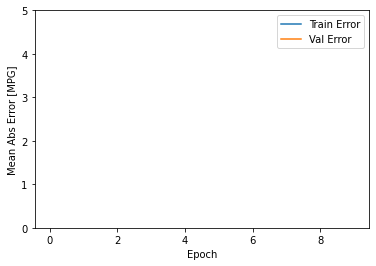

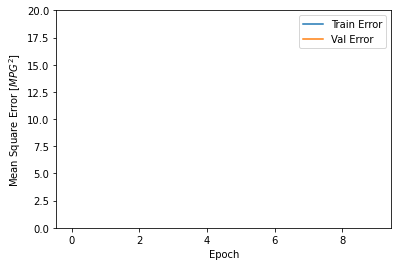

In [86]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

该图表显示在约100个 epochs 之后误差非但没有改进，反而出现恶化。 让我们更新 `model.fit` 调用，当验证值没有提高上是自动停止训练。
我们将使用一个 *EarlyStopping callback* 来测试每个 epoch 的训练条件。如果经过一定数量的 epochs 后没有改进，则自动停止训练。

你可以从[这里](https://tensorflow.google.cn/versions/master/api_docs/python/tf/keras/callbacks/EarlyStopping)学习到更多的回调。


..............................................................................................

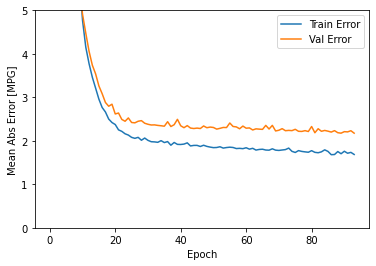

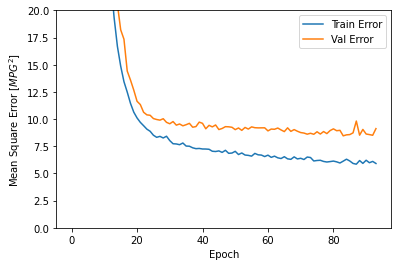

In [26]:
model = build_model()

# patience 值用来检查改进 epochs 的数量
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

如图所示，验证集中的平均的误差通常在 +/- 2 MPG左右。 这个结果好么？ 我们将决定权留给你。

让我们看看通过使用 **测试集** 来泛化模型的效果如何，我们在训练模型时没有使用测试集。这告诉我们，当我们在现实世界中使用这个模型时，我们可以期望它预测得有多好。

In [27]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 6.8613 - mae: 2.1281 - mse: 6.8613 - 19ms/epoch - 6ms/step
Testing set Mean Abs Error:  2.13 MPG


### 做预测
 
最后，使用测试集中的数据预测 MPG 值:

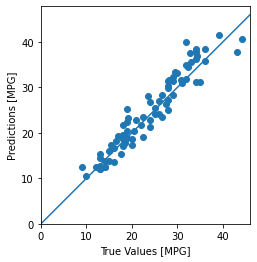

In [28]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
# 展示图
plt.show()

这看起来我们的模型预测得相当好。我们来看下误差分布。

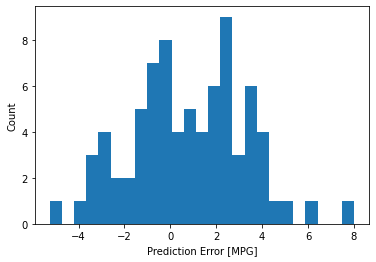

In [29]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")
plt.show()

它不是完全的高斯分布，但我们可以推断出，这是因为样本的数量很小所导致的。

## 结论

本笔记本 (notebook) 介绍了一些处理回归问题的技术。

* 均方误差（MSE）是用于回归问题的常见损失函数（分类问题中使用不同的损失函数）。
* 类似的，用于回归的评估指标与分类不同。 常见的回归指标是平均绝对误差（MAE）。
* 当数字输入数据特征的值存在不同范围时，每个特征应独立缩放到相同范围。
* 如果训练数据不多，一种方法是选择隐藏层较少的小网络，以避免过度拟合。
* 早期停止是一种防止过度拟合的有效技术。